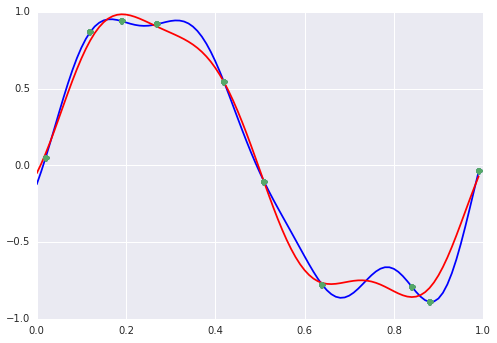

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
import math

X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])
plt.plot(X, t, 'o')

def phi(x): 
    s = 0.1
    return np.append(1, np.exp(-(x - np.arange(0, 1 + s, s)) ** 2 / (2 * s * s)))

PHI = np.array([phi(x) for x in X])
w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t))

alpha = 0.1
beta = 9.0
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(np.dot(Sigma_N, PHI.T), t)

xlist = np.arange(0, 1, 0.01)
plt.plot(xlist, [np.dot(w, phi(x)) for x in xlist], 'b')
plt.plot(xlist, [np.dot(mu_N, phi(x)) for x in xlist], 'r')
plt.plot(X, t, 'o')
plt.show()

In [2]:
np.set_printoptions(precision=1)
print(Sigma_N)

[[ 2.9 -2.  -0.9 -1.1 -1.3 -1.1 -1.2 -1.1 -1.2 -1.1 -1.  -2.1]
 [-2.   2.3 -0.7  1.9  0.1  1.   0.8  0.6  1.   0.7  0.7  1.4]
 [-0.9 -0.7  2.5 -1.9  2.  -0.3  0.4  0.6  0.1  0.4  0.3  0.6]
 [-1.1  1.9 -1.9  3.  -1.7  1.5  0.2  0.3  0.7  0.3  0.4  0.8]
 [-1.3  0.1  2.  -1.7  2.8 -1.1  1.4  0.2  0.5  0.5  0.4  0.9]
 [-1.1  1.  -0.3  1.5 -1.1  2.4 -1.4  1.7 -0.3  0.5  0.5  0.7]
 [-1.2  0.8  0.4  0.2  1.4 -1.4  2.9 -2.1  2.4 -0.   0.3  1. ]
 [-1.1  0.6  0.6  0.3  0.2  1.7 -2.1  4.  -2.7  1.4  0.4  0.7]
 [-1.2  1.   0.1  0.7  0.5 -0.3  2.4 -2.7  4.  -1.4  1.2  0.6]
 [-1.1  0.7  0.4  0.3  0.5  0.5 -0.   1.4 -1.4  3.3 -2.3  2.1]
 [-1.   0.7  0.3  0.4  0.4  0.5  0.3  0.4  1.2 -2.3  3.1 -0.9]
 [-2.1  1.4  0.6  0.8  0.9  0.7  1.   0.7  0.6  2.1 -0.9  2.4]]


共分散行列から、以下のような特徴がわかる。
- 定数項とその他の w_i の間には負の相関が見られる。
- 隣接する w_i の間には負の相関が見られる。
- 離れた w_i の間の相関は 0 に近い。

# 予測分布を描く

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


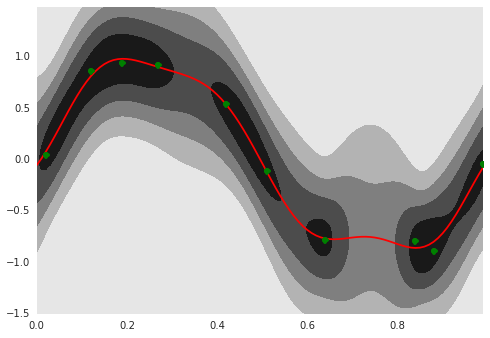

In [3]:
def normal_dist_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var)

def quad_form(A, x):
    return np.dot(x, np.dot(A, x))

def draw_predicted_dist(mu_N, Sigma_N, phi, beta):
    xlist = np.arange(0, 1, 0.01)
    tlist = np.arange(-1.5, 1.5, 0.01)
    z = np.array([normal_dist_pdf(
            tlist, np.dot(mu_N, phi(x)), 1. / beta + quad_form(Sigma_N, phi(x))) for x in xlist]).T
    plt.contourf(xlist, tlist, z, 5, cmap=plt.cm.binary)
    plt.plot(xlist, [np.dot(mu_N, phi(x)) for x in xlist], 'r')
    plt.plot(X, t, 'go')
    plt.show()
draw_predicted_dist(mu_N, Sigma_N, phi, beta)

$\alpha$を大きくすると、w の係数が押さえつけられる。w が従う正規分布の分散が小さくなるため。ちなみに、こういう $\alpha$のように、ベイジアンの事前分布に入っているパラメータのことを特にハイパーパラメータと呼ぶ。

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


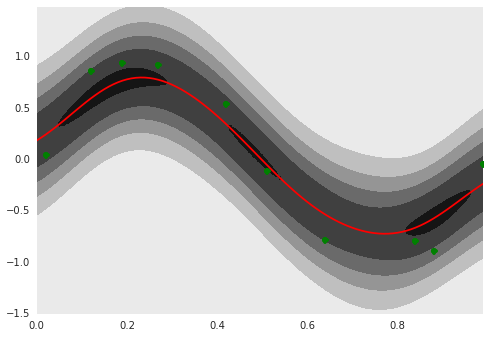

In [4]:
alpha = 10
beta = 9.0
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(np.dot(Sigma_N, PHI.T), t)
draw_predicted_dist(mu_N, Sigma_N, phi, beta)

$\beta$は精度を表しており、「どのくらい真の値と観測値の間のノイズを許すか」を表す。$\beta$を小さくすると、レンジが大きくなるし、$\beta$を大きくすると、レンジが小さくなる。1以上の大きな値が好まれるらしい。

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


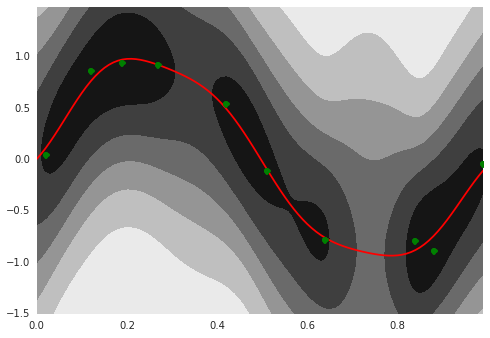

In [5]:
alpha = 0.1
beta = 2
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(np.dot(Sigma_N, PHI.T), t)
draw_predicted_dist(mu_N, Sigma_N, phi, beta)

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


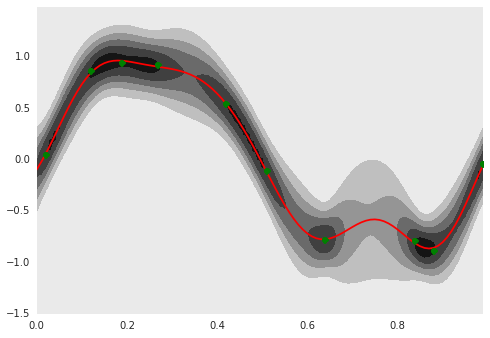

In [7]:
alpha = 0.1
beta = 50
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(np.dot(Sigma_N, PHI.T), t)
draw_predicted_dist(mu_N, Sigma_N, phi, beta)